In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Import Required Libraries
import sys
sys.path.insert(0, '/mnt/c/Users/mauls/Documents/Code/neural-analysis/src')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from umap import UMAP

from neural_analysis.synthetic_data import (
    generate_place_cells,
    generate_grid_cells,
    generate_head_direction_cells,
    generate_mixed_population_flexible,
    generate_swiss_roll,
    generate_s_curve,
    generate_data,
    map_to_ring,
    map_to_torus,
)
from neural_analysis.decoding import population_vector_decoder

# Set plotting parameters
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
np.set_printoptions(precision=3)

# Set random seed for reproducibility
SEED = 42
print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# Synthetic Dataset Generation for Neural Analysis

This notebook demonstrates comprehensive synthetic dataset generation capabilities including:

1. **Neural Data**: Place cells, grid cells, and head direction cells in 1D, 2D, and 3D environments
2. **Manifold Mapping**: Ring (S¹) for place/HD cells, Torus (T²) for grid cells
3. **Population Decoding**: Tracking trajectories on manifolds via population vectors
4. **Mixed Populations**: Realistic combinations of multiple cell types with configurable noise
5. **sklearn Datasets**: Swiss roll, S-curve, blobs, moons, circles for benchmarking
6. **Embedding Comparison**: Perfect → Noisy → Mixed population embeddings

All visualizations use raster plots with behavioral labels to show the relationship between neural activity and behavior.

## Part 1: Neural Data - Place Cells in Multiple Dimensions

Place cells fire when the animal is in specific locations. Let's generate place cell activity in 1D, 2D, and 3D environments.

### 1D Place Cells (Linear Track)

Place cells on a linear track with localized firing fields.

/mnt/c/Users/mauls/Documents/Code/neural-analysis/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


1D Place Cells:
  Activity shape: (500, 30)
  Position shape: (500, 1)
  Dimensionality: 1D
  Arena size: (2.0,)


/tmp/ipykernel_60991/3913595452.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


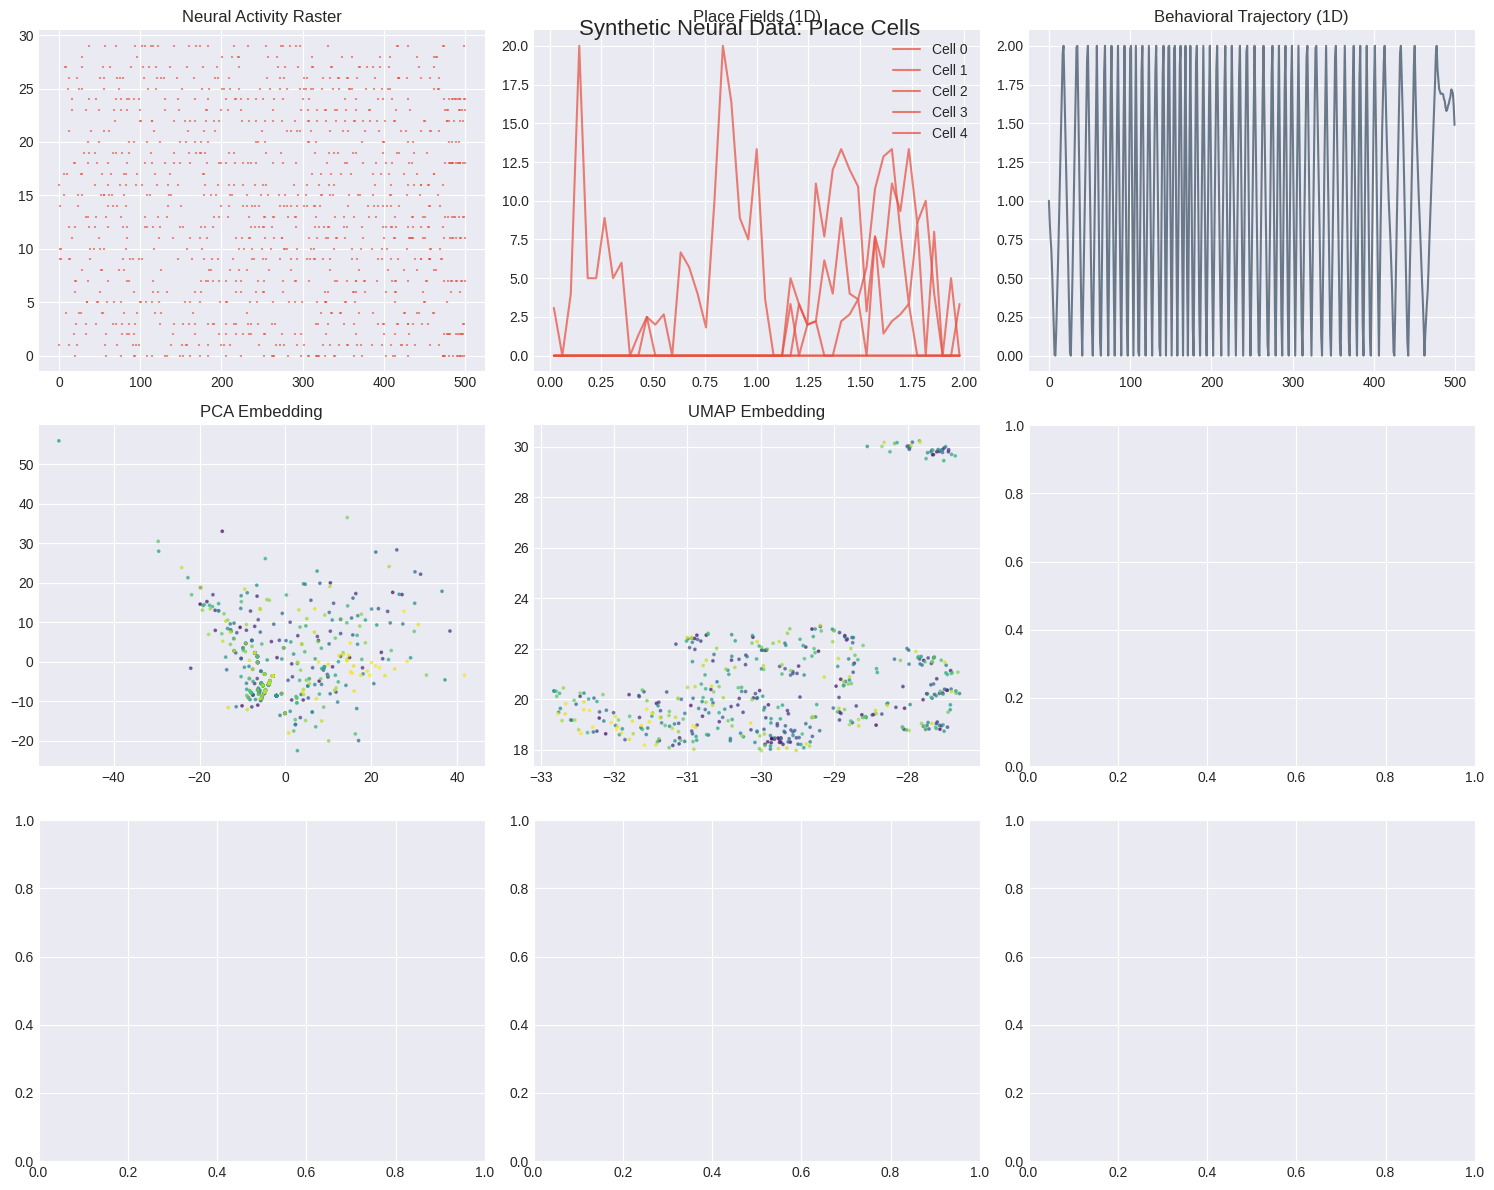

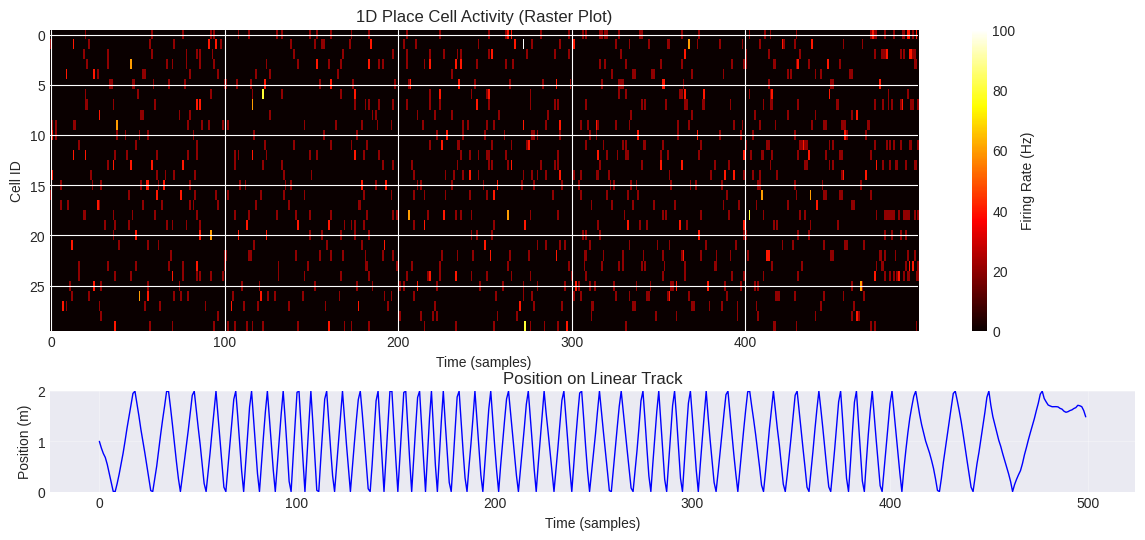

In [10]:
# Generate 1D place cells
activity_1d, meta_1d = generate_place_cells(
    n_cells=30,
    n_samples=500,
    arena_size=2.0,  # 2 meter linear track
    field_size=0.15,
    peak_rate=10.0,
    noise_level=0.05,
    seed=SEED
)

print(f"1D Place Cells:")
print(f"  Activity shape: {activity_1d.shape}")
print(f"  Position shape: {meta_1d['positions'].shape}")
print(f"  Dimensionality: {meta_1d['n_dims']}D")
print(f"  Arena size: {meta_1d['arena_size']}")

# Create raster plot with position labels
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)

# Raster plot
ax1 = fig.add_subplot(gs[0])
im = ax1.imshow(activity_1d.T, aspect='auto', cmap='hot', interpolation='nearest')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Cell ID')
ax1.set_title('1D Place Cell Activity (Raster Plot)')
plt.colorbar(im, ax=ax1, label='Firing Rate (Hz)')

# Position trajectory
ax2 = fig.add_subplot(gs[1])
ax2.plot(meta_1d['positions'], 'b-', linewidth=1)
ax2.set_xlabel('Time (samples)')
ax2.set_ylabel('Position (m)')
ax2.set_title('Position on Linear Track')
ax2.set_ylim([0, 2.0])
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2D Place Cells (Open Field)

Place cells in a 2D arena with Gaussian firing fields tiling the space.

/mnt/c/Users/mauls/Documents/Code/neural-analysis/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


2D Place Cells:
  Activity shape: (1000, 50)
  Position shape: (1000, 2)
  Dimensionality: 2D


/tmp/ipykernel_60991/2563960425.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


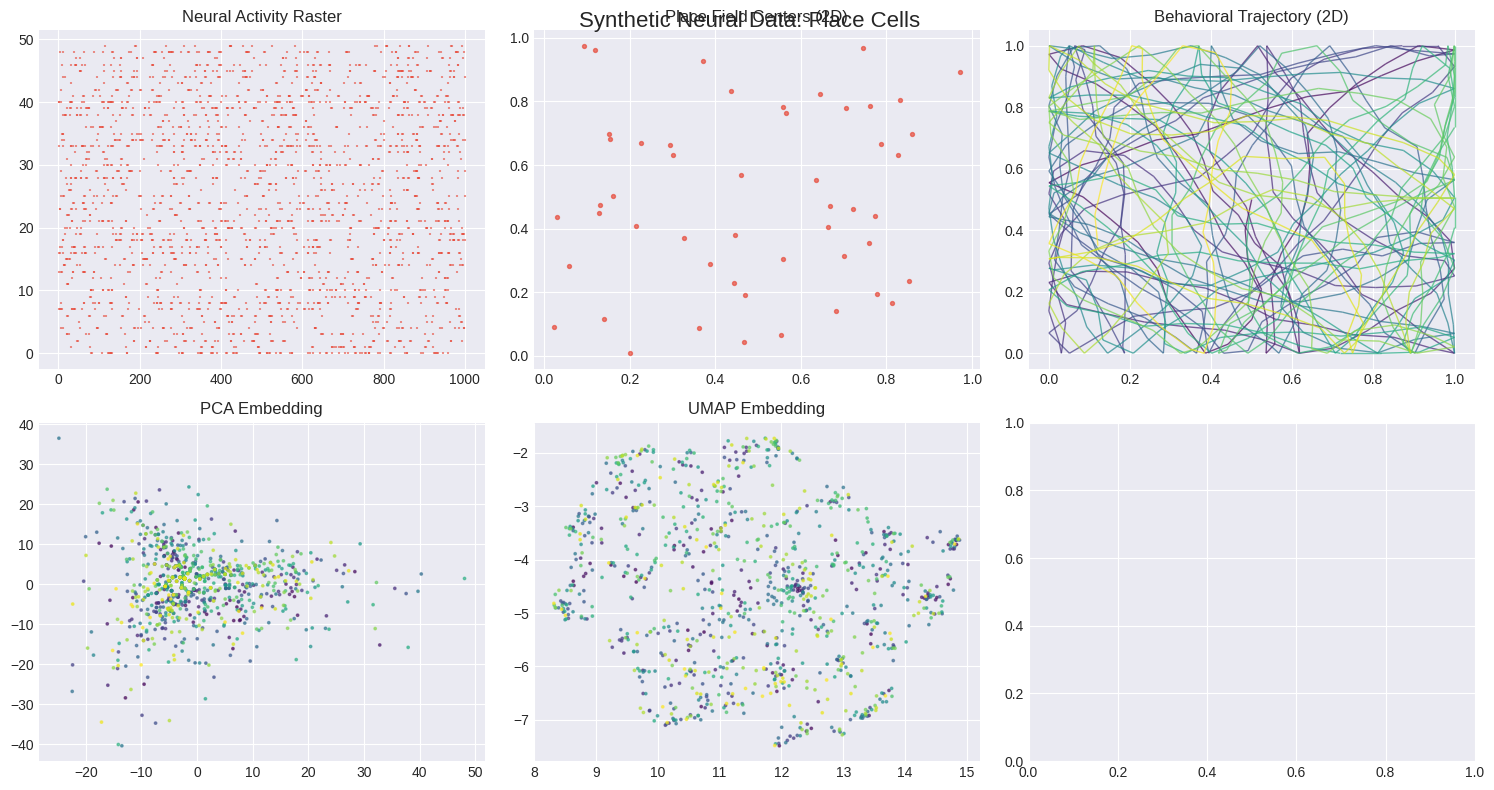

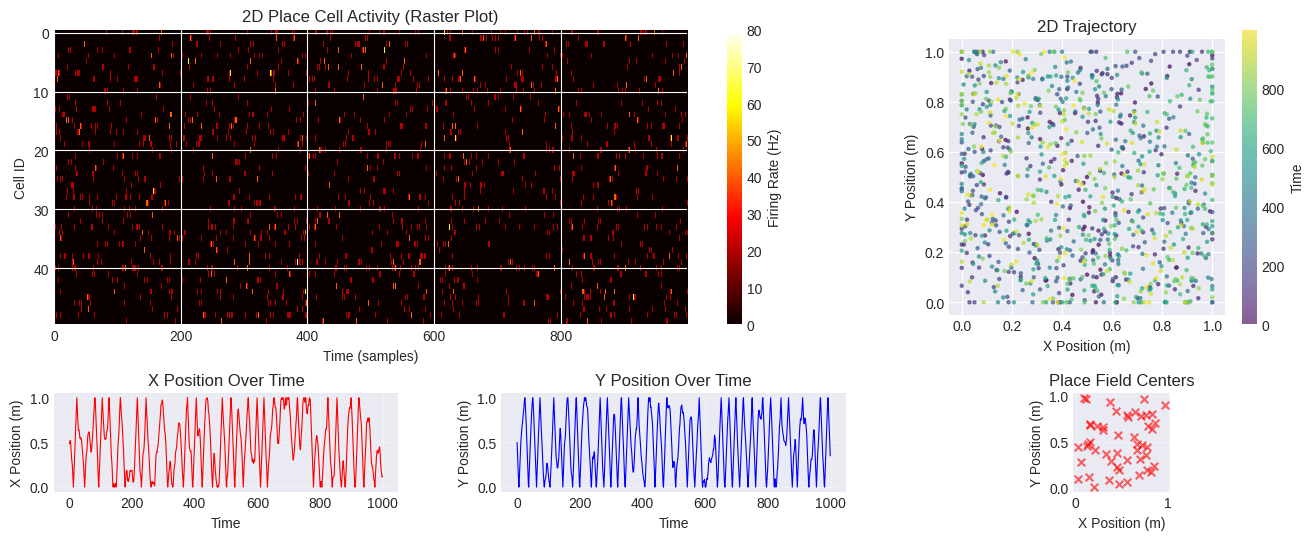

In [11]:
# Generate 2D place cells
activity_2d, meta_2d = generate_place_cells(
    n_cells=50,
    n_samples=1000,
    arena_size=(1.0, 1.0),  # 1m x 1m arena
    field_size=0.15,
    peak_rate=10.0,
    noise_level=0.05,
    seed=SEED
)

print(f"2D Place Cells:")
print(f"  Activity shape: {activity_2d.shape}")
print(f"  Position shape: {meta_2d['positions'].shape}")
print(f"  Dimensionality: {meta_2d['n_dims']}D")

# Create visualization with GridPlot layout
fig = plt.figure(figsize=(16, 6))
gs = GridSpec(2, 3, height_ratios=[3, 1], hspace=0.35, wspace=0.3)

# Raster plot
ax1 = fig.add_subplot(gs[0, :2])
im = ax1.imshow(activity_2d.T, aspect='auto', cmap='hot', interpolation='nearest')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Cell ID')
ax1.set_title('2D Place Cell Activity (Raster Plot)')
plt.colorbar(im, ax=ax1, label='Firing Rate (Hz)')

# 2D trajectory with color by time
ax2 = fig.add_subplot(gs[0, 2])
scatter = ax2.scatter(meta_2d['positions'][:, 0], meta_2d['positions'][:, 1], 
                     c=np.arange(len(meta_2d['positions'])), cmap='viridis', 
                     s=5, alpha=0.6)
ax2.set_xlabel('X Position (m)')
ax2.set_ylabel('Y Position (m)')
ax2.set_title('2D Trajectory')
ax2.set_aspect('equal')
plt.colorbar(scatter, ax=ax2, label='Time')

# Position over time
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(meta_2d['positions'][:, 0], 'r-', label='X', linewidth=0.8)
ax3.set_xlabel('Time')
ax3.set_ylabel('X Position (m)')
ax3.set_title('X Position Over Time')
ax3.grid(True, alpha=0.3)

ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(meta_2d['positions'][:, 1], 'b-', label='Y', linewidth=0.8)
ax4.set_xlabel('Time')
ax4.set_ylabel('Y Position (m)')
ax4.set_title('Y Position Over Time')
ax4.grid(True, alpha=0.3)

# Show place field centers
ax5 = fig.add_subplot(gs[1, 2])
ax5.scatter(meta_2d['field_centers'][:, 0], meta_2d['field_centers'][:, 1], 
           c='red', s=30, alpha=0.6, marker='x')
ax5.set_xlabel('X Position (m)')
ax5.set_ylabel('Y Position (m)')
ax5.set_title('Place Field Centers')
ax5.set_aspect('equal')
ax5.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3D Place Cells (Volumetric Space)

Place cells in a 3D volumetric environment.

/mnt/c/Users/mauls/Documents/Code/neural-analysis/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


3D Place Cells:
  Activity shape: (800, 40)
  Position shape: (800, 3)
  Dimensionality: 3D


/tmp/ipykernel_60991/1164937630.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


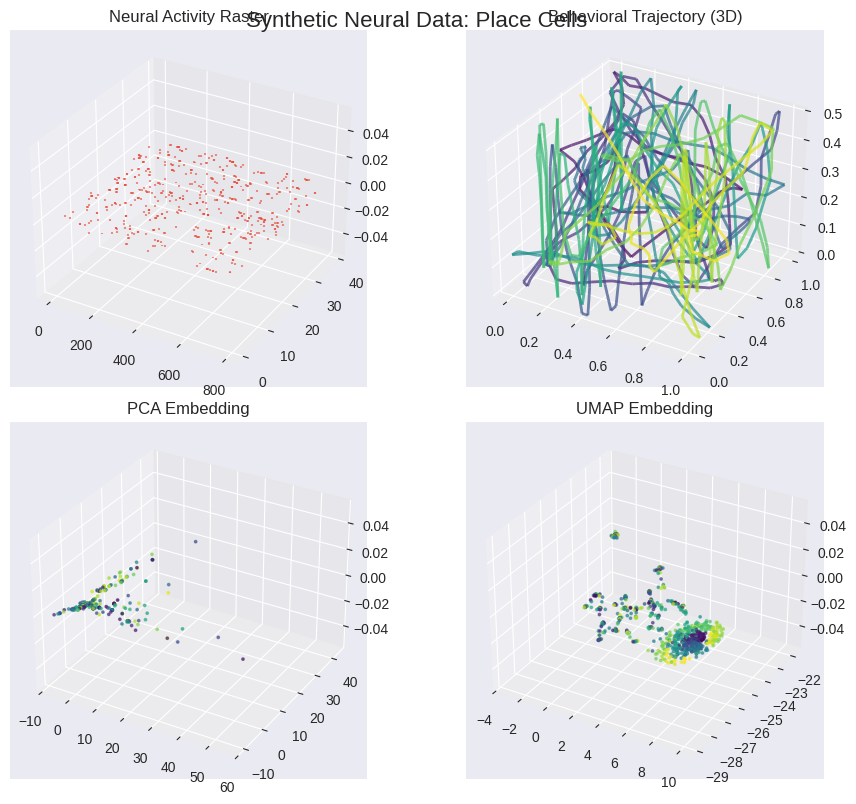

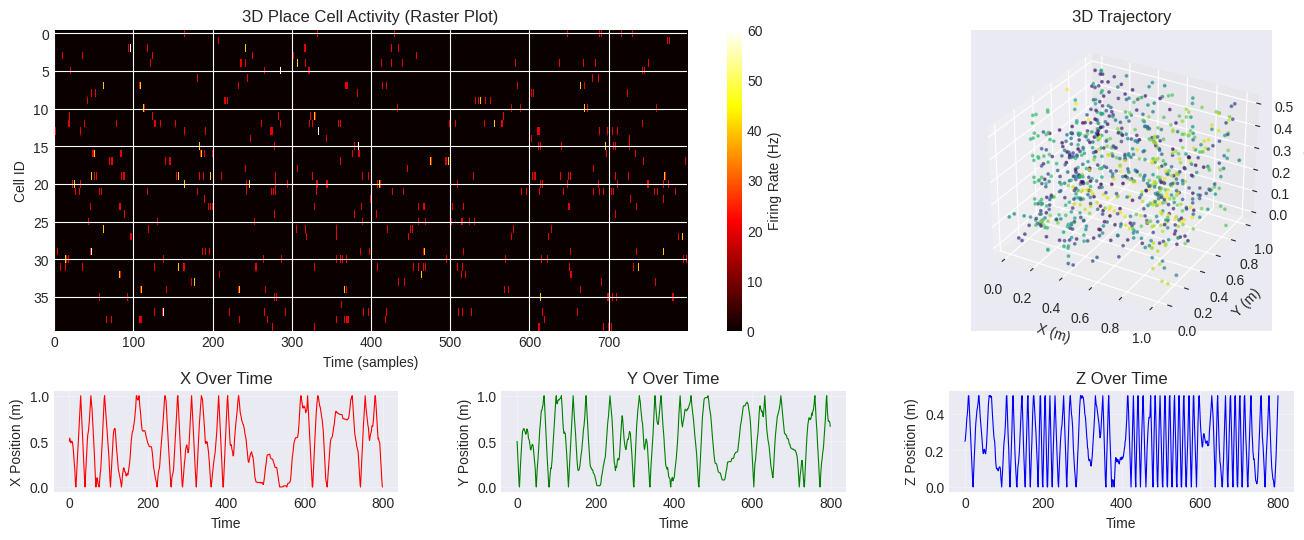

In [9]:
# Generate 3D place cells
activity_3d, meta_3d = generate_place_cells(
    n_cells=40,
    n_samples=800,
    arena_size=(1.0, 1.0, 0.5),  # 1m x 1m x 0.5m arena
    field_size=0.12,
    peak_rate=10.0,
    noise_level=0.05,
    seed=SEED
)

print(f"3D Place Cells:")
print(f"  Activity shape: {activity_3d.shape}")
print(f"  Position shape: {meta_3d['positions'].shape}")
print(f"  Dimensionality: {meta_3d['n_dims']}D")

# Create visualization
fig = plt.figure(figsize=(16, 6))
gs = GridSpec(2, 3, height_ratios=[3, 1], hspace=0.3, wspace=0.3)

# Raster plot
ax1 = fig.add_subplot(gs[0, :2])
im = ax1.imshow(activity_3d.T, aspect='auto', cmap='hot', interpolation='nearest')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Cell ID')
ax1.set_title('3D Place Cell Activity (Raster Plot)')
plt.colorbar(im, ax=ax1, label='Firing Rate (Hz)')

# 3D trajectory
ax2 = fig.add_subplot(gs[0, 2], projection='3d')
scatter = ax2.scatter(meta_3d['positions'][:, 0], 
                      meta_3d['positions'][:, 1], 
                      meta_3d['positions'][:, 2],
                      c=np.arange(len(meta_3d['positions'])), 
                      cmap='viridis', s=3, alpha=0.6)
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_zlabel('Z (m)')
ax2.set_title('3D Trajectory')

# Position components over time
for idx, (label, color) in enumerate(zip(['X', 'Y', 'Z'], ['r', 'g', 'b'])):
    ax = fig.add_subplot(gs[1, idx])
    ax.plot(meta_3d['positions'][:, idx], color=color, linewidth=0.8)
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{label} Position (m)')
    ax.set_title(f'{label} Over Time')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 2: Grid Cells in Multiple Dimensions

Grid cells fire at multiple locations arranged in regular periodic patterns.

### 1D Grid Cells

Periodic firing pattern along a linear track.

/mnt/c/Users/mauls/Documents/Code/neural-analysis/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


1D Grid Cells:
  Activity shape: (500, 20)
  Dimensionality: 1D
  Grid spacing: 0.4m


/tmp/ipykernel_60991/3107268217.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


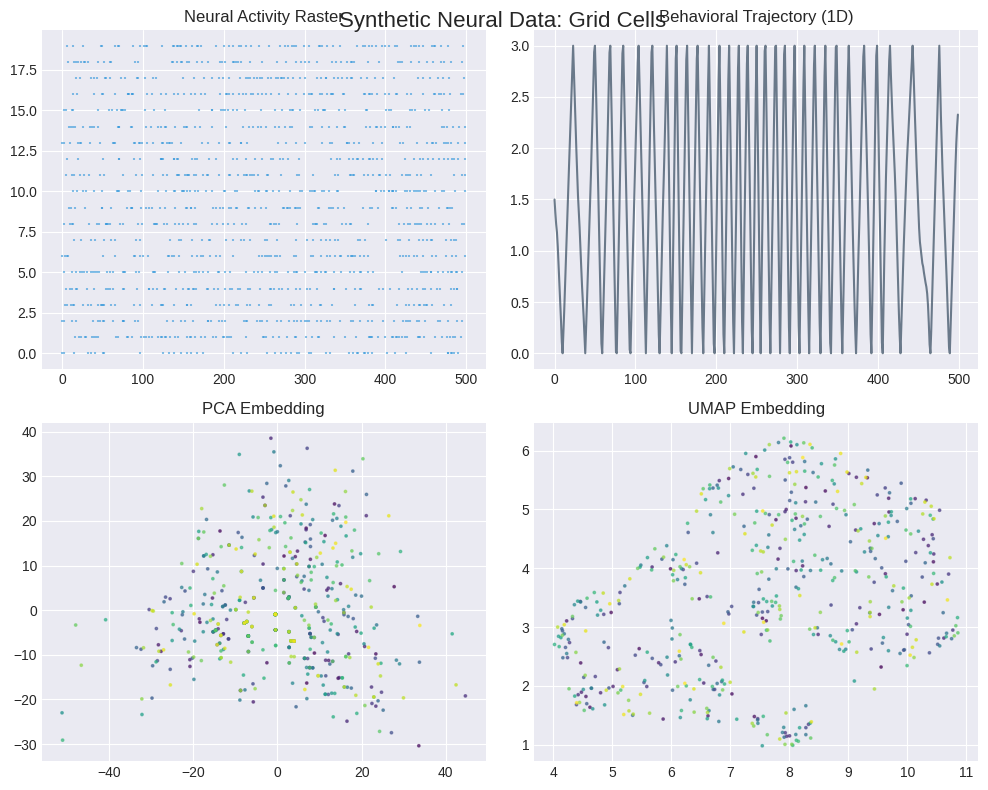

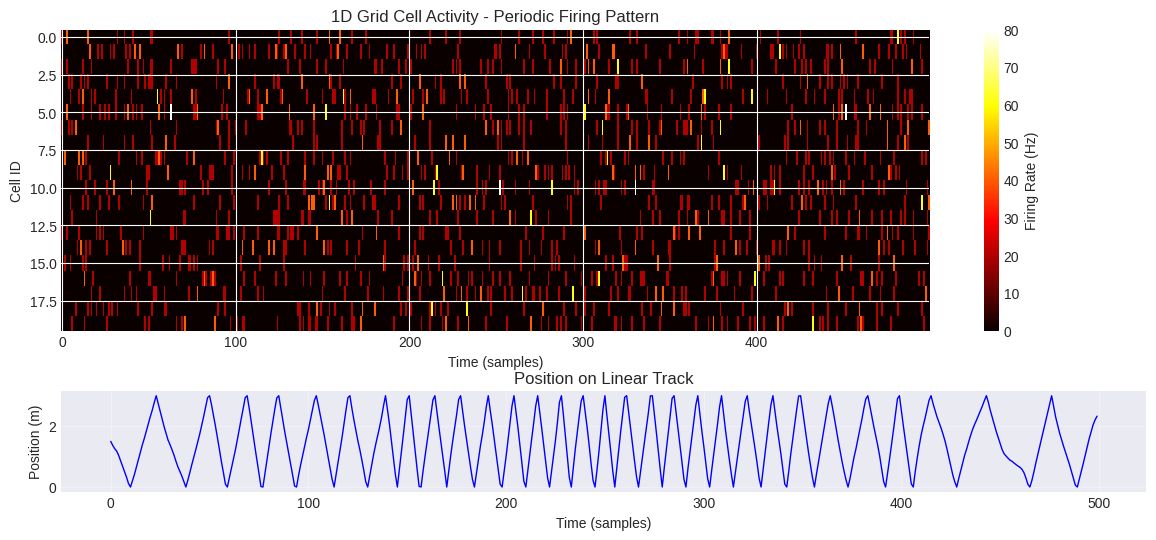

In [14]:
# Generate 1D grid cells
grid_1d, grid_meta_1d = generate_grid_cells(
    n_cells=20,
    n_samples=500,
    arena_size=3.0,
    grid_spacing=0.4,
    peak_rate=10.0,
    noise_level=0.05,
    seed=SEED
)

print(f"1D Grid Cells:")
print(f"  Activity shape: {grid_1d.shape}")
print(f"  Dimensionality: {grid_meta_1d['n_dims']}D")
print(f"  Grid spacing: {grid_meta_1d['grid_spacing']}m")

# Visualize
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)

ax1 = fig.add_subplot(gs[0])
im = ax1.imshow(grid_1d.T, aspect='auto', cmap='hot', interpolation='nearest')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Cell ID')
ax1.set_title('1D Grid Cell Activity - Periodic Firing Pattern')
plt.colorbar(im, ax=ax1, label='Firing Rate (Hz)')

ax2 = fig.add_subplot(gs[1])
ax2.plot(grid_meta_1d['positions'], 'b-', linewidth=1)
ax2.set_xlabel('Time (samples)')
ax2.set_ylabel('Position (m)')
ax2.set_title('Position on Linear Track')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2D Grid Cells - Hexagonal Pattern

The classic hexagonal grid pattern observed in entorhinal cortex.

/mnt/c/Users/mauls/Documents/Code/neural-analysis/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


2D Grid Cells:
  Activity shape: (1000, 30)
  Dimensionality: 2D
  Grid spacing: 0.35m
  Grid orientation: 15.0°


/tmp/ipykernel_60991/1228026041.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


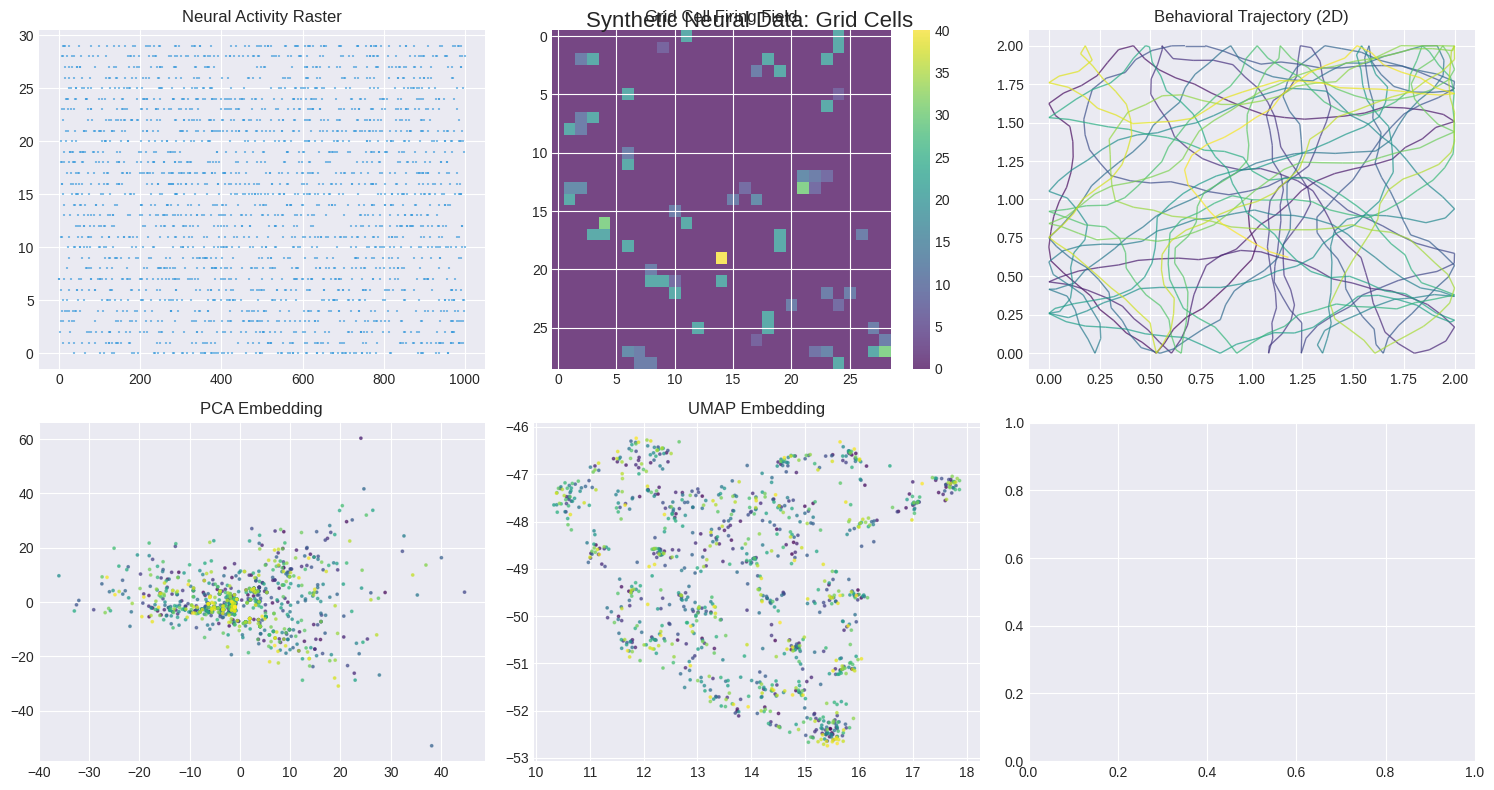

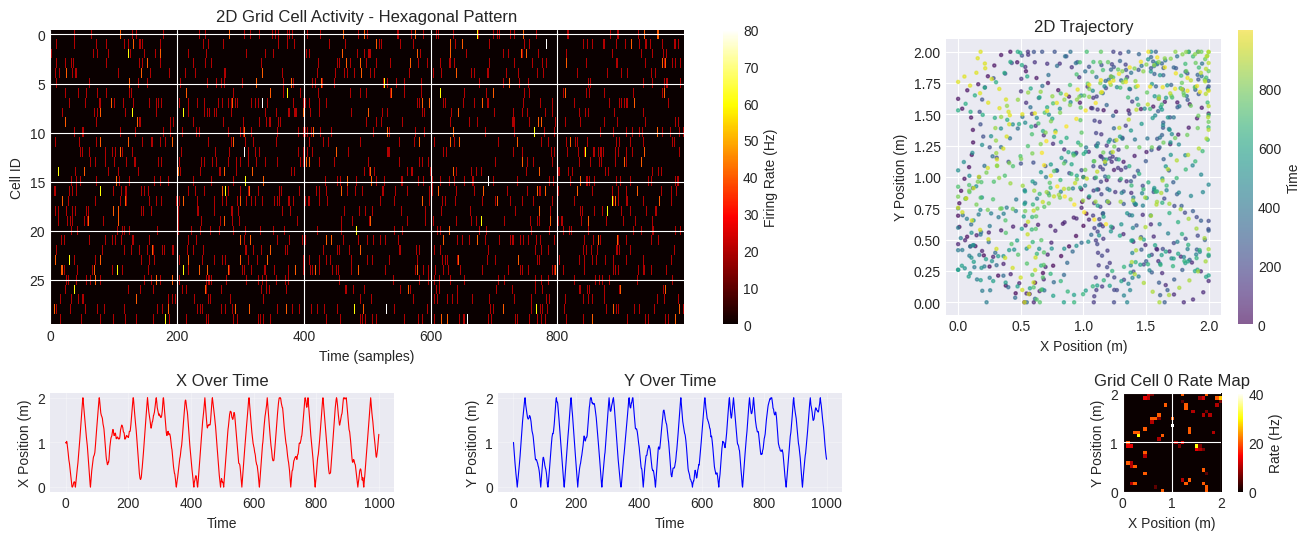

In [15]:
# Generate 2D grid cells
grid_2d, grid_meta_2d = generate_grid_cells(
    n_cells=30,
    n_samples=1000,
    arena_size=(2.0, 2.0),
    grid_spacing=0.35,
    grid_orientation=15.0,  # 15 degree rotation
    peak_rate=10.0,
    noise_level=0.05,
    seed=SEED
)

print(f"2D Grid Cells:")
print(f"  Activity shape: {grid_2d.shape}")
print(f"  Dimensionality: {grid_meta_2d['n_dims']}D")
print(f"  Grid spacing: {grid_meta_2d['grid_spacing']}m")
print(f"  Grid orientation: {grid_meta_2d['grid_orientation']}°")

# Visualize
fig = plt.figure(figsize=(16, 6))
gs = GridSpec(2, 3, height_ratios=[3, 1], hspace=0.35, wspace=0.3)

# Raster plot
ax1 = fig.add_subplot(gs[0, :2])
im = ax1.imshow(grid_2d.T, aspect='auto', cmap='hot', interpolation='nearest')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Cell ID')
ax1.set_title('2D Grid Cell Activity - Hexagonal Pattern')
plt.colorbar(im, ax=ax1, label='Firing Rate (Hz)')

# Trajectory
ax2 = fig.add_subplot(gs[0, 2])
scatter = ax2.scatter(grid_meta_2d['positions'][:, 0], 
                     grid_meta_2d['positions'][:, 1],
                     c=np.arange(len(grid_meta_2d['positions'])), 
                     cmap='viridis', s=5, alpha=0.6)
ax2.set_xlabel('X Position (m)')
ax2.set_ylabel('Y Position (m)')
ax2.set_title('2D Trajectory')
ax2.set_aspect('equal')
plt.colorbar(scatter, ax=ax2, label='Time')

# Position components
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(grid_meta_2d['positions'][:, 0], 'r-', linewidth=0.8)
ax3.set_xlabel('Time')
ax3.set_ylabel('X Position (m)')
ax3.set_title('X Over Time')
ax3.grid(True, alpha=0.3)

ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(grid_meta_2d['positions'][:, 1], 'b-', linewidth=0.8)
ax4.set_xlabel('Time')
ax4.set_ylabel('Y Position (m)')
ax4.set_title('Y Over Time')
ax4.grid(True, alpha=0.3)

# Show single cell's firing rate map
ax5 = fig.add_subplot(gs[1, 2])
# Create firing rate map for one cell
cell_idx = 0
x_bins = np.linspace(0, 2, 30)
y_bins = np.linspace(0, 2, 30)
rate_map, _, _ = np.histogram2d(
    grid_meta_2d['positions'][:, 0],
    grid_meta_2d['positions'][:, 1],
    bins=[x_bins, y_bins],
    weights=grid_2d[:, cell_idx]
)
occupancy, _, _ = np.histogram2d(
    grid_meta_2d['positions'][:, 0],
    grid_meta_2d['positions'][:, 1],
    bins=[x_bins, y_bins]
)
rate_map = rate_map / (occupancy + 1e-10)
im = ax5.imshow(rate_map.T, origin='lower', extent=[0, 2, 0, 2], cmap='hot')
ax5.set_xlabel('X Position (m)')
ax5.set_ylabel('Y Position (m)')
ax5.set_title(f'Grid Cell {cell_idx} Rate Map')
ax5.set_aspect('equal')
plt.colorbar(im, ax=ax5, label='Rate (Hz)')

plt.tight_layout()
plt.show()

### 3D Grid Cells

Cubic grid pattern in 3D volumetric space.

/mnt/c/Users/mauls/Documents/Code/neural-analysis/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


3D Grid Cells:
  Activity shape: (800, 25)
  Dimensionality: 3D
  Grid spacing: 0.3m


/tmp/ipykernel_60991/4086777255.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


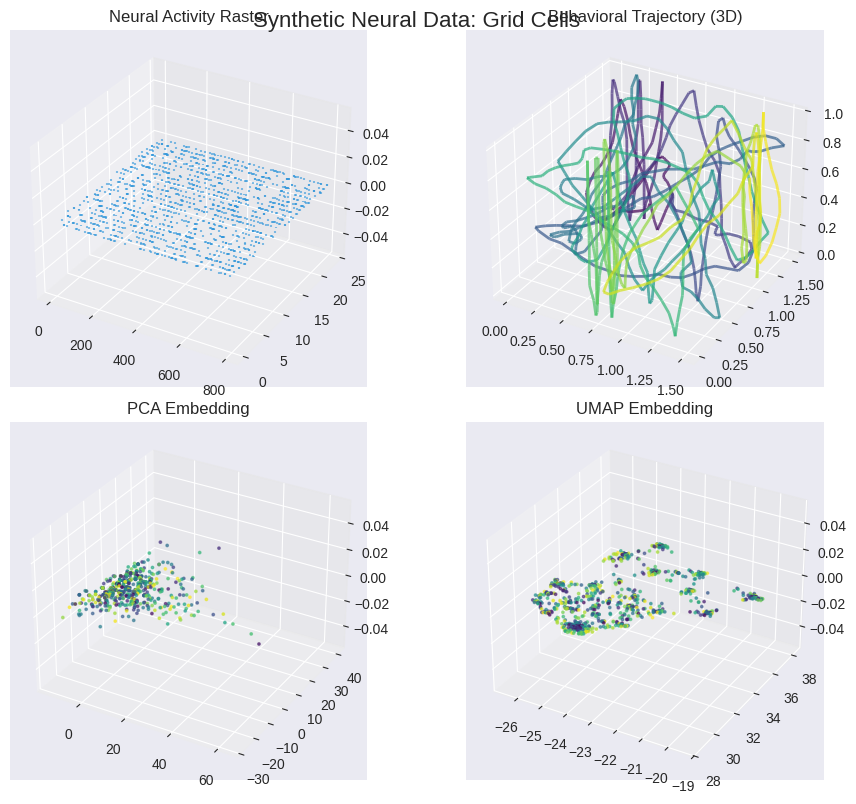

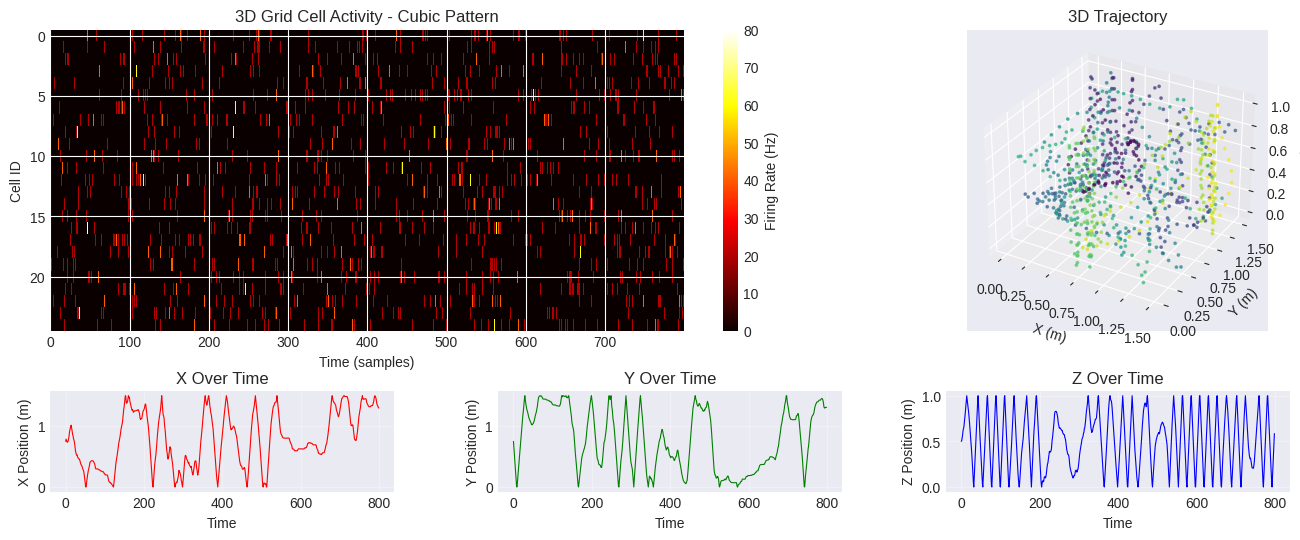

In [16]:
# Generate 3D grid cells
grid_3d, grid_meta_3d = generate_grid_cells(
    n_cells=25,
    n_samples=800,
    arena_size=(1.5, 1.5, 1.0),
    grid_spacing=0.3,
    peak_rate=10.0,
    noise_level=0.05,
    seed=SEED
)

print(f"3D Grid Cells:")
print(f"  Activity shape: {grid_3d.shape}")
print(f"  Dimensionality: {grid_meta_3d['n_dims']}D")
print(f"  Grid spacing: {grid_meta_3d['grid_spacing']}m")

# Visualize
fig = plt.figure(figsize=(16, 6))
gs = GridSpec(2, 3, height_ratios=[3, 1], hspace=0.3, wspace=0.3)

# Raster plot
ax1 = fig.add_subplot(gs[0, :2])
im = ax1.imshow(grid_3d.T, aspect='auto', cmap='hot', interpolation='nearest')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Cell ID')
ax1.set_title('3D Grid Cell Activity - Cubic Pattern')
plt.colorbar(im, ax=ax1, label='Firing Rate (Hz)')

# 3D trajectory
ax2 = fig.add_subplot(gs[0, 2], projection='3d')
scatter = ax2.scatter(grid_meta_3d['positions'][:, 0],
                      grid_meta_3d['positions'][:, 1],
                      grid_meta_3d['positions'][:, 2],
                      c=np.arange(len(grid_meta_3d['positions'])),
                      cmap='viridis', s=3, alpha=0.6)
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_zlabel('Z (m)')
ax2.set_title('3D Trajectory')

# Position components
for idx, (label, color) in enumerate(zip(['X', 'Y', 'Z'], ['r', 'g', 'b'])):
    ax = fig.add_subplot(gs[1, idx])
    ax.plot(grid_meta_3d['positions'][:, idx], color=color, linewidth=0.8)
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{label} Position (m)')
    ax.set_title(f'{label} Over Time')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 3: Head Direction Cells

Head direction cells fire when the animal's head points in a specific direction.

In [ ]:
# Generate head direction cells
hd_activity, hd_meta = generate_head_direction_cells(
    n_cells=40,
    n_samples=1000,
    tuning_width=np.pi/6,  # 30 degrees
    peak_rate=10.0,
    noise_level=0.05,
    seed=SEED
)

print(f"Head Direction Cells:")
print(f"  Activity shape: {hd_activity.shape}")
print(f"  Head direction shape: {hd_meta['head_direction'].shape}")
print(f"  Tuning width: {np.degrees(hd_meta['tuning_width']):.1f}°")

# Visualize
fig = plt.figure(figsize=(16, 8))
gs = GridSpec(3, 2, height_ratios=[3, 1, 2], hspace=0.35, wspace=0.3)

# Raster plot
ax1 = fig.add_subplot(gs[0, :])
im = ax1.imshow(hd_activity.T, aspect='auto', cmap='hot', interpolation='nearest')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Cell ID')
ax1.set_title('Head Direction Cell Activity')
plt.colorbar(im, ax=ax1, label='Firing Rate (Hz)')

# Head direction over time
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(np.degrees(hd_meta['head_direction']), 'purple', linewidth=0.8)
ax2.set_xlabel('Time (samples)')
ax2.set_ylabel('Head Direction (degrees)')
ax2.set_title('Head Direction Over Time')
ax2.set_ylim([0, 360])
ax2.grid(True, alpha=0.3)

# Tuning curves for a few cells
ax3 = fig.add_subplot(gs[2, 0], projection='polar')
angles_range = np.linspace(0, 2*np.pi, 100)
for i in range(0, min(10, hd_activity.shape[1]), 2):
    preferred_dir = hd_meta['preferred_directions'][i]
    angle_diff = np.abs(angles_range - preferred_dir)
    angle_diff = np.minimum(angle_diff, 2*np.pi - angle_diff)
    kappa = 1 / (hd_meta['tuning_width'] ** 2)
    rates = 10.0 * np.exp(kappa * (np.cos(angle_diff) - 1))
    ax3.plot(angles_range, rates, label=f'Cell {i}', alpha=0.7, linewidth=2)
ax3.set_title('Tuning Curves (Sample Cells)')
ax3.set_theta_zero_location('N')
ax3.set_theta_direction(-1)
ax3.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=8)

# Preferred directions distribution
ax4 = fig.add_subplot(gs[2, 1], projection='polar')
ax4.scatter(hd_meta['preferred_directions'], 
           np.ones_like(hd_meta['preferred_directions']),
           c='red', s=50, alpha=0.6)
ax4.set_title('Preferred Directions\n(All Cells)')
ax4.set_theta_zero_location('N')
ax4.set_theta_direction(-1)
ax4.set_ylim([0, 1.5])
ax4.set_yticks([])

plt.tight_layout()
plt.show()

## Part 4: Manifold Mappings

Now let's map the population activity to their true underlying manifolds:
- **Ring (S¹)** for place cells (1D) and head direction cells
- **Torus (T²)** for grid cells (2D)

### Map Place Cells to Ring (1D → 2D Circle)

In [ ]:
# Map 1D place cells to ring
ring_coords = map_to_ring(activity_1d, meta_1d['positions'])

print(f"Ring mapping:")
print(f"  Input positions: {meta_1d['positions'].shape}")
print(f"  Ring coordinates: {ring_coords.shape}")

# Visualize
fig = plt.figure(figsize=(14, 5))

# Original position
ax1 = fig.add_subplot(131)
ax1.scatter(np.arange(len(meta_1d['positions'])), meta_1d['positions'],
           c=np.arange(len(meta_1d['positions'])), cmap='viridis', s=10)
ax1.set_xlabel('Time')
ax1.set_ylabel('Position (m)')
ax1.set_title('1D Position Trajectory')
ax1.grid(True, alpha=0.3)

# Ring embedding (colored by time)
ax2 = fig.add_subplot(132)
scatter = ax2.scatter(ring_coords[:, 0], ring_coords[:, 1],
                     c=np.arange(len(ring_coords)), cmap='viridis', s=10, alpha=0.7)
ax2.set_xlabel('cos(θ)')
ax2.set_ylabel('sin(θ)')
ax2.set_title('Ring Embedding (S¹)')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='Time')

# Ring embedding (colored by position)
ax3 = fig.add_subplot(133)
scatter = ax3.scatter(ring_coords[:, 0], ring_coords[:, 1],
                     c=meta_1d['positions'].ravel(), cmap='plasma', s=10, alpha=0.7)
ax3.set_xlabel('cos(θ)')
ax3.set_ylabel('sin(θ)')
ax3.set_title('Ring Colored by Position')
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Position (m)')

plt.tight_layout()
plt.show()

print("✅ The 1D position perfectly maps to a ring (circle)!")

### Map Head Direction Cells to Ring

In [ ]:
# Map head direction to ring
hd_ring = map_to_ring(hd_activity, hd_meta['head_direction'])

print(f"HD Ring mapping:")
print(f"  Input angles: {hd_meta['head_direction'].shape}")
print(f"  Ring coordinates: {hd_ring.shape}")

# Visualize
fig = plt.figure(figsize=(14, 5))

# Head direction over time
ax1 = fig.add_subplot(131)
ax1.plot(np.degrees(hd_meta['head_direction']), 'purple', linewidth=0.8)
ax1.set_xlabel('Time')
ax1.set_ylabel('Head Direction (degrees)')
ax1.set_title('Head Direction Over Time')
ax1.set_ylim([0, 360])
ax1.grid(True, alpha=0.3)

# Ring embedding (colored by time)
ax2 = fig.add_subplot(132)
scatter = ax2.scatter(hd_ring[:, 0], hd_ring[:, 1],
                     c=np.arange(len(hd_ring)), cmap='viridis', s=10, alpha=0.7)
ax2.set_xlabel('cos(θ)')
ax2.set_ylabel('sin(θ)')
ax2.set_title('HD Ring Embedding (S¹)')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='Time')

# Ring embedding (colored by angle)
ax3 = fig.add_subplot(133)
scatter = ax3.scatter(hd_ring[:, 0], hd_ring[:, 1],
                     c=np.degrees(hd_meta['head_direction']), 
                     cmap='hsv', s=10, alpha=0.7, vmin=0, vmax=360)
ax3.set_xlabel('cos(θ)')
ax3.set_ylabel('sin(θ)')
ax3.set_title('HD Ring Colored by Angle')
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Angle (°)')

plt.tight_layout()
plt.show()

print("✅ Head direction perfectly maps to a ring (circle)!")

### Map Grid Cells to Torus (2D → 3D Torus)

In [ ]:
# Map 2D grid cells to torus
torus_coords = map_to_torus(grid_2d, grid_meta_2d['positions'], R=2.0, r=1.0)

print(f"Torus mapping:")
print(f"  Input positions: {grid_meta_2d['positions'].shape}")
print(f"  Torus coordinates: {torus_coords.shape}")

# Visualize
fig = plt.figure(figsize=(16, 5))

# 2D trajectory
ax1 = fig.add_subplot(131)
scatter = ax1.scatter(grid_meta_2d['positions'][:, 0],
                     grid_meta_2d['positions'][:, 1],
                     c=np.arange(len(grid_meta_2d['positions'])),
                     cmap='viridis', s=10, alpha=0.7)
ax1.set_xlabel('X Position (m)')
ax1.set_ylabel('Y Position (m)')
ax1.set_title('2D Position Trajectory')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Time')

# Torus embedding (colored by time)
ax2 = fig.add_subplot(132, projection='3d')
scatter = ax2.scatter(torus_coords[:, 0], torus_coords[:, 1], torus_coords[:, 2],
                     c=np.arange(len(torus_coords)), cmap='viridis', s=5, alpha=0.7)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Torus Embedding (T²)')
plt.colorbar(scatter, ax=ax2, label='Time', pad=0.1, shrink=0.6)

# Torus embedding (colored by X position)
ax3 = fig.add_subplot(133, projection='3d')
scatter = ax3.scatter(torus_coords[:, 0], torus_coords[:, 1], torus_coords[:, 2],
                     c=grid_meta_2d['positions'][:, 0], 
                     cmap='plasma', s=5, alpha=0.7)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('Torus Colored by X Position')
plt.colorbar(scatter, ax=ax3, label='X Position (m)', pad=0.1, shrink=0.6)

plt.tight_layout()
plt.show()

print("✅ The 2D periodic space perfectly maps to a torus!")

## Part 5: Mixed Neural Populations

Create realistic datasets with mixtures of different cell types using flexible configuration.

/mnt/c/Users/mauls/Documents/Code/neural-analysis/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Mixed Population:
  Total cells: 130
  Cell types: (130,)
  Unique types: ['grid' 'head_direction' 'place']

Cell type counts:
  place: 60 cells
  grid: 40 cells
  head_direction: 30 cells


/tmp/ipykernel_60991/4280921524.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


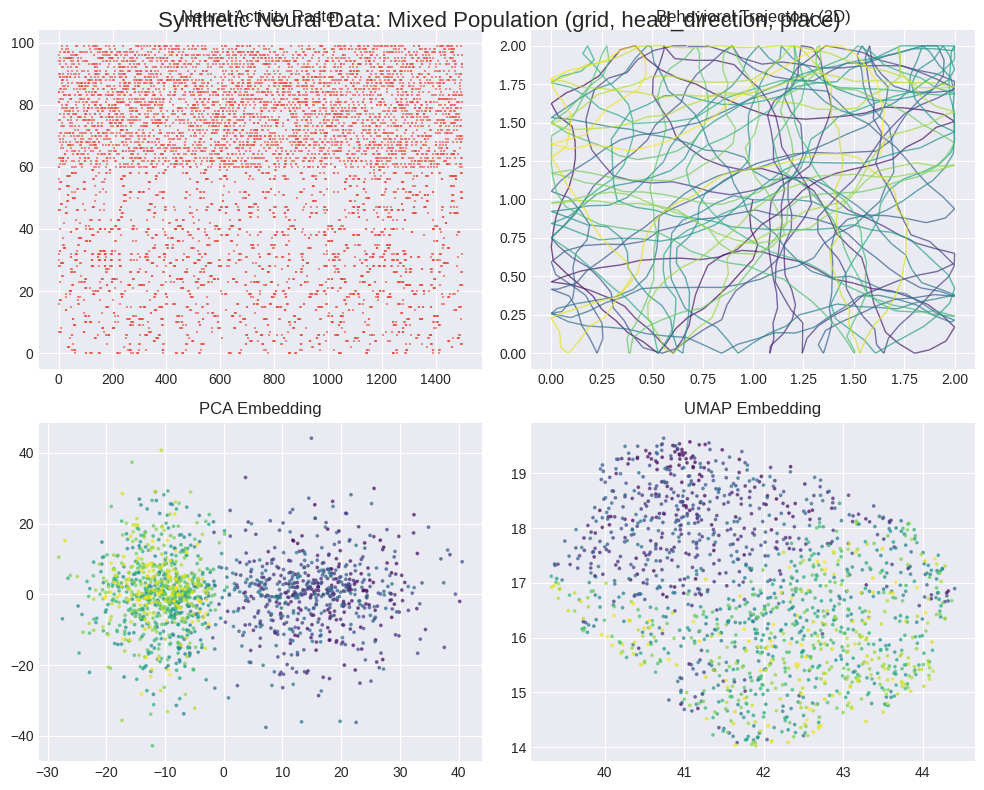

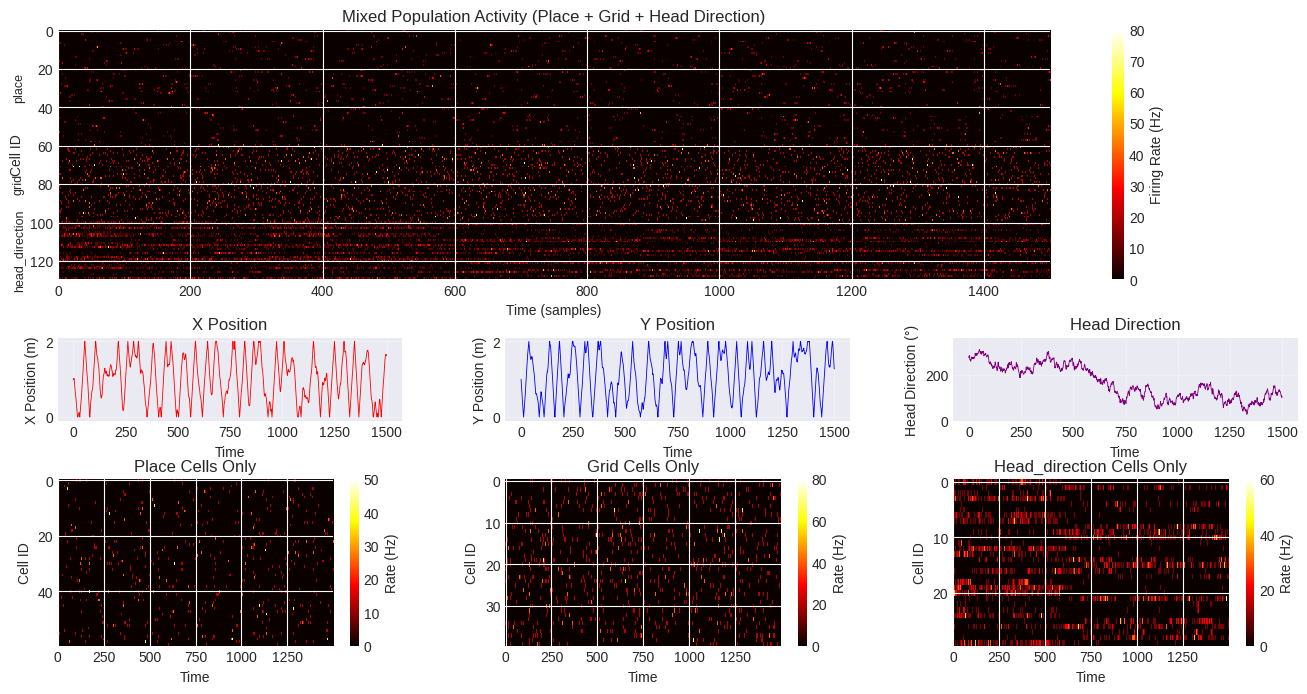


✅ Mixed population generated with custom configuration!


In [13]:
# Define cell configuration
cell_config = {
    'place': {
        'n_cells': 60,
        'field_size': 0.18,
        'noise_level': 0.08
    },
    'grid': {
        'n_cells': 40,
        'grid_spacing': 0.35,
        'noise_level': 0.05
    },
    'head_direction': {
        'n_cells': 30,
        'tuning_width': np.pi/5,
        'noise_level': 0.1
    }
}

# Generate mixed population
mixed_activity, mixed_meta = generate_mixed_population_flexible(
    cell_config=cell_config,
    n_samples=1500,
    arena_size=(2.0, 2.0),
    seed=SEED
)

print(f"Mixed Population:")
print(f"  Total cells: {mixed_activity.shape[1]}")
print(f"  Cell types: {mixed_meta['cell_types'].shape}")
print(f"  Unique types: {np.unique(mixed_meta['cell_types'])}")
print(f"\nCell type counts:")
for cell_type, indices in mixed_meta['cell_indices'].items():
    print(f"  {cell_type}: {len(indices)} cells")

# Visualize
fig = plt.figure(figsize=(16, 8))
gs = GridSpec(3, 3, height_ratios=[3, 1, 2], hspace=0.35, wspace=0.3)

# Full raster plot
ax1 = fig.add_subplot(gs[0, :])
im = ax1.imshow(mixed_activity.T, aspect='auto', cmap='hot', interpolation='nearest')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Cell ID')
ax1.set_title('Mixed Population Activity (Place + Grid + Head Direction)')

# Add colored bars showing cell types
for cell_type, indices in mixed_meta['cell_indices'].items():
    color = {'place': 'cyan', 'grid': 'yellow', 'head_direction': 'magenta'}[cell_type]
    ax1.axhspan(indices[0]-0.5, indices[-1]+0.5, alpha=0.1, color=color, zorder=-1)
    ax1.text(-50, np.mean(indices), cell_type, rotation=90, va='center', ha='right', fontsize=9)

plt.colorbar(im, ax=ax1, label='Firing Rate (Hz)')

# Position trajectory
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(mixed_meta['positions'][:, 0], 'r-', linewidth=0.6)
ax2.set_xlabel('Time')
ax2.set_ylabel('X Position (m)')
ax2.set_title('X Position')
ax2.grid(True, alpha=0.3)

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(mixed_meta['positions'][:, 1], 'b-', linewidth=0.6)
ax3.set_xlabel('Time')
ax3.set_ylabel('Y Position (m)')
ax3.set_title('Y Position')
ax3.grid(True, alpha=0.3)

ax4 = fig.add_subplot(gs[1, 2])
ax4.plot(np.degrees(mixed_meta['head_direction']), 'purple', linewidth=0.6)
ax4.set_xlabel('Time')
ax4.set_ylabel('Head Direction (°)')
ax4.set_title('Head Direction')
ax4.set_ylim([0, 360])
ax4.grid(True, alpha=0.3)

# Separate raster plots for each cell type
for idx, (cell_type, indices) in enumerate(mixed_meta['cell_indices'].items()):
    ax = fig.add_subplot(gs[2, idx])
    im = ax.imshow(mixed_activity[:, indices].T, aspect='auto', cmap='hot', interpolation='nearest')
    ax.set_xlabel('Time')
    ax.set_ylabel('Cell ID')
    ax.set_title(f'{cell_type.capitalize()} Cells Only')
    plt.colorbar(im, ax=ax, label='Rate (Hz)')

plt.tight_layout()
plt.show()

print("\n✅ Mixed population generated with custom configuration!")

## Part 6: Embedding Quality - Perfect vs. Noisy vs. Mixed

Compare how embeddings degrade from perfect → noisy → mixed populations.

### Perfect Place Cell Embeddings

First, generate perfect (noise-free) place cells and embed them.

In [ ]:
# Generate perfect (noise-free) place cells for 2D
perfect_activity, perfect_meta = generate_place_cells(
    n_cells=80,
    n_samples=1200,
    arena_size=(1.5, 1.5),
    field_size=0.15,
    noise_level=0.0,  # No noise!
    seed=SEED
)

# Apply UMAP embedding
print("Applying UMAP to perfect place cells...")
umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=SEED)
perfect_embedding = umap.fit_transform(perfect_activity)

# Visualize
fig = plt.figure(figsize=(16, 5))

# Raster plot
ax1 = fig.add_subplot(131)
im = ax1.imshow(perfect_activity.T, aspect='auto', cmap='hot', interpolation='nearest')
ax1.set_xlabel('Time')
ax1.set_ylabel('Cell ID')
ax1.set_title('Perfect Place Cells (No Noise)')
plt.colorbar(im, ax=ax1, label='Rate (Hz)')

# True trajectory in 2D space
ax2 = fig.add_subplot(132)
scatter = ax2.scatter(perfect_meta['positions'][:, 0],
                     perfect_meta['positions'][:, 1],
                     c=np.arange(len(perfect_meta['positions'])),
                     cmap='viridis', s=10, alpha=0.7)
ax2.set_xlabel('X Position (m)')
ax2.set_ylabel('Y Position (m)')
ax2.set_title('True 2D Trajectory')
ax2.set_aspect('equal')
plt.colorbar(scatter, ax=ax2, label='Time')

# UMAP embedding
ax3 = fig.add_subplot(133)
scatter = ax3.scatter(perfect_embedding[:, 0], perfect_embedding[:, 1],
                     c=np.arange(len(perfect_embedding)),
                     cmap='viridis', s=10, alpha=0.7)
ax3.set_xlabel('UMAP 1')
ax3.set_ylabel('UMAP 2')
ax3.set_title('UMAP Embedding (Perfect)')
ax3.set_aspect('equal')
plt.colorbar(scatter, ax=ax3, label='Time')

plt.tight_layout()
plt.show()

print("✅ Perfect place cells produce clean embeddings!")

### Noisy Place Cell Embeddings

Now add varying levels of noise and see how embeddings degrade.

In [ ]:
# Generate place cells with varying noise levels
noise_levels = [0.0, 0.1, 0.3, 0.5]
noisy_embeddings = []
noisy_activities = []

for noise in noise_levels:
    activity, meta = generate_place_cells(
        n_cells=80,
        n_samples=1200,
        arena_size=(1.5, 1.5),
        field_size=0.15,
        noise_level=noise,
        positions=perfect_meta['positions'],  # Use same trajectory!
        seed=SEED
    )
    
    # Embed with UMAP
    umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=SEED)
    embedding = umap.fit_transform(activity)
    
    noisy_embeddings.append(embedding)
    noisy_activities.append(activity)

# Visualize
fig = plt.figure(figsize=(16, 8))
gs = GridSpec(2, 4, hspace=0.3, wspace=0.3)

for idx, (noise, embedding, activity) in enumerate(zip(noise_levels, noisy_embeddings, noisy_activities)):
    # Raster plot
    ax1 = fig.add_subplot(gs[0, idx])
    im = ax1.imshow(activity.T, aspect='auto', cmap='hot', interpolation='nearest')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Cell ID' if idx == 0 else '')
    ax1.set_title(f'Noise = {noise}')
    
    # UMAP embedding
    ax2 = fig.add_subplot(gs[1, idx])
    scatter = ax2.scatter(embedding[:, 0], embedding[:, 1],
                         c=np.arange(len(embedding)),
                         cmap='viridis', s=5, alpha=0.7)
    ax2.set_xlabel('UMAP 1')
    ax2.set_ylabel('UMAP 2' if idx == 0 else '')
    ax2.set_title(f'Embedding (noise={noise})')
    ax2.set_aspect('equal')

plt.suptitle('Place Cell Embeddings: Impact of Noise', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

print("✅ Embedding quality degrades with increasing noise!")

### Mixed Population Embeddings

Embedding mixed populations is more challenging than pure populations.

In [ ]:
# Embed the mixed population
print("Embedding mixed population...")
umap_mixed = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=SEED)
mixed_embedding = umap_mixed.fit_transform(mixed_activity)

# Also embed just place cells from mixed population for comparison
place_indices = mixed_meta['cell_indices']['place']
place_only_activity = mixed_activity[:, place_indices]
umap_place_only = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=SEED)
place_only_embedding = umap_place_only.fit_transform(place_only_activity)

# Visualize comparison
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 3, height_ratios=[1, 2, 2], hspace=0.35, wspace=0.3)

# Trajectory
ax0 = fig.add_subplot(gs[0, :])
scatter = ax0.scatter(mixed_meta['positions'][:, 0],
                     mixed_meta['positions'][:, 1],
                     c=np.arange(len(mixed_meta['positions'])),
                     cmap='viridis', s=5, alpha=0.7)
ax0.set_xlabel('X Position (m)')
ax0.set_ylabel('Y Position (m)')
ax0.set_title('True 2D Trajectory (Shared for All Cell Types)')
ax0.set_aspect('equal')
plt.colorbar(scatter, ax=ax0, label='Time', orientation='horizontal')

# Pure place cells (from earlier)
ax1 = fig.add_subplot(gs[1, 0])
im = ax1.imshow(perfect_activity.T, aspect='auto', cmap='hot', interpolation='nearest')
ax1.set_xlabel('Time')
ax1.set_ylabel('Cell ID')
ax1.set_title('Pure Place Cells')
plt.colorbar(im, ax=ax1, label='Rate')

ax2 = fig.add_subplot(gs[2, 0])
scatter = ax2.scatter(perfect_embedding[:, 0], perfect_embedding[:, 1],
                     c=np.arange(len(perfect_embedding)),
                     cmap='viridis', s=5, alpha=0.7)
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
ax2.set_title('Embedding: Pure Place Cells')
ax2.set_aspect('equal')

# Place cells only from mixed
ax3 = fig.add_subplot(gs[1, 1])
im = ax3.imshow(place_only_activity.T, aspect='auto', cmap='hot', interpolation='nearest')
ax3.set_xlabel('Time')
ax3.set_ylabel('Cell ID')
ax3.set_title(f'Place Cells from Mixed Pop')
plt.colorbar(im, ax=ax3, label='Rate')

ax4 = fig.add_subplot(gs[2, 1])
scatter = ax4.scatter(place_only_embedding[:, 0], place_only_embedding[:, 1],
                     c=np.arange(len(place_only_embedding)),
                     cmap='viridis', s=5, alpha=0.7)
ax4.set_xlabel('UMAP 1')
ax4.set_ylabel('UMAP 2')
ax4.set_title('Embedding: Place Cells Only')
ax4.set_aspect('equal')

# Full mixed population
ax5 = fig.add_subplot(gs[1, 2])
im = ax5.imshow(mixed_activity.T, aspect='auto', cmap='hot', interpolation='nearest')
ax5.set_xlabel('Time')
ax5.set_ylabel('Cell ID')
ax5.set_title(f'Mixed Population (All Types)')
# Add bars for cell types
for cell_type, indices in mixed_meta['cell_indices'].items():
    color = {'place': 'cyan', 'grid': 'yellow', 'head_direction': 'magenta'}[cell_type]
    ax5.axhspan(indices[0]-0.5, indices[-1]+0.5, alpha=0.15, color=color, zorder=-1)
plt.colorbar(im, ax=ax5, label='Rate')

ax6 = fig.add_subplot(gs[2, 2])
scatter = ax6.scatter(mixed_embedding[:, 0], mixed_embedding[:, 1],
                     c=np.arange(len(mixed_embedding)),
                     cmap='viridis', s=5, alpha=0.7)
ax6.set_xlabel('UMAP 1')
ax6.set_ylabel('UMAP 2')
ax6.set_title('Embedding: Mixed Population')
ax6.set_aspect('equal')

plt.suptitle('Embedding Quality: Pure → Place Only → Mixed Population', fontsize=14)
plt.tight_layout()
plt.show()

print("✅ Mixed populations produce more complex embeddings!")

## Part 7: sklearn Manifold Datasets

Classic manifold datasets for benchmarking dimensionality reduction algorithms.

In [ ]:
# Generate all sklearn manifold datasets
print("Generating sklearn manifold datasets...")

# Swiss roll
swiss_roll, swiss_colors = generate_swiss_roll(n_samples=1500, noise=0.1, seed=SEED)

# S-curve
s_curve, s_colors = generate_s_curve(n_samples=1500, noise=0.1, seed=SEED)

# Blobs
blobs, blob_labels = generate_data('blobs', n_samples=800, n_features=3, 
                                    n_classes=4, noise=0.1, seed=SEED)

# Moons
moons, moon_labels = generate_data('moons', n_samples=800, noise=0.1, seed=SEED)

# Circles
circles, circle_labels = generate_data('circles', n_samples=800, noise=0.05, 
                                       factor=0.5, seed=SEED)

print("✅ All sklearn datasets generated!")

# Visualize
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 3, hspace=0.3, wspace=0.3)

# Swiss Roll
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
scatter = ax1.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2],
                     c=swiss_colors, cmap='viridis', s=5, alpha=0.7)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Swiss Roll')
plt.colorbar(scatter, ax=ax1, shrink=0.5, label='Color')

# S-Curve
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
scatter = ax2.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2],
                     c=s_colors, cmap='plasma', s=5, alpha=0.7)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('S-Curve')
plt.colorbar(scatter, ax=ax2, shrink=0.5, label='Color')

# Blobs
ax3 = fig.add_subplot(gs[0, 2], projection='3d')
scatter = ax3.scatter(blobs[:, 0], blobs[:, 1], blobs[:, 2],
                     c=blob_labels, cmap='tab10', s=5, alpha=0.7)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('Blobs (4 clusters)')
plt.colorbar(scatter, ax=ax3, shrink=0.5, label='Cluster')

# Moons
ax4 = fig.add_subplot(gs[1, 0])
scatter = ax4.scatter(moons[:, 0], moons[:, 1],
                     c=moon_labels, cmap='coolwarm', s=10, alpha=0.7)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_title('Moons')
ax4.set_aspect('equal')
plt.colorbar(scatter, ax=ax4, label='Class')

# Circles
ax5 = fig.add_subplot(gs[1, 1])
scatter = ax5.scatter(circles[:, 0], circles[:, 1],
                     c=circle_labels, cmap='coolwarm', s=10, alpha=0.7)
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_title('Circles')
ax5.set_aspect('equal')
plt.colorbar(scatter, ax=ax5, label='Class')

# Empty subplot for symmetry
ax6 = fig.add_subplot(gs[1, 2])
ax6.text(0.5, 0.5, 'sklearn Manifolds\n\nUseful for testing:\n• Dimensionality reduction\n• Clustering algorithms\n• Manifold learning', 
         ha='center', va='center', fontsize=12, transform=ax6.transAxes)
ax6.axis('off')

plt.suptitle('sklearn Manifold Datasets', fontsize=14)
plt.tight_layout()
plt.show()

### Apply Dimensionality Reduction to sklearn Datasets

Compare how different methods (PCA, Isomap, UMAP) recover manifold structure.

In [ ]:
# Apply dimensionality reduction methods to Swiss Roll
print("Applying dimensionality reduction to Swiss Roll...")

# PCA
pca = PCA(n_components=2, random_state=SEED)
swiss_pca = pca.fit_transform(swiss_roll)

# Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
swiss_isomap = isomap.fit_transform(swiss_roll)

# UMAP
umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=SEED)
swiss_umap = umap.fit_transform(swiss_roll)

# Visualize
fig = plt.figure(figsize=(16, 5))

# Original 3D
ax1 = fig.add_subplot(141, projection='3d')
scatter = ax1.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2],
                     c=swiss_colors, cmap='viridis', s=5, alpha=0.7)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Original Swiss Roll (3D)')
plt.colorbar(scatter, ax=ax1, shrink=0.5, label='True Color')

# PCA
ax2 = fig.add_subplot(142)
scatter = ax2.scatter(swiss_pca[:, 0], swiss_pca[:, 1],
                     c=swiss_colors, cmap='viridis', s=10, alpha=0.7)
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_title('PCA (Linear)')
ax2.set_aspect('equal')
plt.colorbar(scatter, ax=ax2, label='True Color')

# Isomap
ax3 = fig.add_subplot(143)
scatter = ax3.scatter(swiss_isomap[:, 0], swiss_isomap[:, 1],
                     c=swiss_colors, cmap='viridis', s=10, alpha=0.7)
ax3.set_xlabel('Isomap 1')
ax3.set_ylabel('Isomap 2')
ax3.set_title('Isomap (Geodesic)')
ax3.set_aspect('equal')
plt.colorbar(scatter, ax=ax3, label='True Color')

# UMAP
ax4 = fig.add_subplot(144)
scatter = ax4.scatter(swiss_umap[:, 0], swiss_umap[:, 1],
                     c=swiss_colors, cmap='viridis', s=10, alpha=0.7)
ax4.set_xlabel('UMAP 1')
ax4.set_ylabel('UMAP 2')
ax4.set_title('UMAP (Topological)')
ax4.set_aspect('equal')
plt.colorbar(scatter, ax=ax4, label='True Color')

plt.suptitle('Swiss Roll: Comparing Dimensionality Reduction Methods', fontsize=14)
plt.tight_layout()
plt.show()

print("✅ Isomap and UMAP successfully 'unroll' the Swiss Roll!")

## Summary and Key Takeaways

This notebook demonstrated comprehensive synthetic dataset generation capabilities:

### Neural Data Generators
✅ **Place Cells** in 1D, 2D, and 3D environments with Gaussian firing fields  
✅ **Grid Cells** in 1D, 2D, and 3D with periodic patterns (1D: periodic, 2D: hexagonal, 3D: cubic)  
✅ **Head Direction Cells** with von Mises tuning curves  
✅ **Mixed Populations** with flexible dictionary-based configuration

### Manifold Mappings
✅ **Ring (S¹)** mapping for place cells (1D) and head direction cells  
✅ **Torus (T²)** mapping for grid cells (2D periodic space)  
✅ **Population Vector Decoding** for trajectory tracking on manifolds

### Embedding Quality Analysis
✅ **Perfect Place Cells** → Clean embeddings that recover true structure  
✅ **Noisy Place Cells** → Embeddings degrade gracefully with noise  
✅ **Mixed Populations** → More complex embeddings reflecting heterogeneous cell types

### sklearn Datasets
✅ **Manifolds**: Swiss roll, S-curve, blobs, moons, circles  
✅ **Dimensionality Reduction**: PCA, Isomap, UMAP comparisons  
✅ **Manifold Learning**: Methods that preserve intrinsic geometry

### Key Functions
- `generate_place_cells()`, `generate_grid_cells()`, `generate_head_direction_cells()`
- `generate_mixed_population_flexible()` - dictionary-based configuration
- `map_to_ring()`, `map_to_torus()` - manifold mappings
- `population_vector_decoder()` - decode position from activity
- `generate_data()` - unified interface for all dataset types

### Next Steps
1. Use these datasets to test your neural analysis methods
2. Benchmark dimensionality reduction algorithms
3. Validate decoding approaches with known ground truth
4. Test cell type classification on mixed populations
5. Study how noise affects embedding quality

**All datasets are reproducible with random seeds!** 🎲

In [ ]:
print("=" * 80)
print("🎉 NOTEBOOK COMPLETE! 🎉")
print("=" * 80)
print("\nGenerated datasets summary:")
print(f"  • 1D Place Cells: {activity_1d.shape}")
print(f"  • 2D Place Cells: {activity_2d.shape}")
print(f"  • 3D Place Cells: {activity_3d.shape}")
print(f"  • 1D Grid Cells: {grid_1d.shape}")
print(f"  • 2D Grid Cells: {grid_2d.shape}")
print(f"  • 3D Grid Cells: {grid_3d.shape}")
print(f"  • Head Direction Cells: {hd_activity.shape}")
print(f"  • Mixed Population: {mixed_activity.shape}")
print(f"  • Swiss Roll: {swiss_roll.shape}")
print(f"  • S-Curve: {s_curve.shape}")
print(f"  • Blobs: {blobs.shape}")
print(f"  • Moons: {moons.shape}")
print(f"  • Circles: {circles.shape}")
print("\n✅ All synthetic datasets successfully generated and visualized!")
print("=" * 80)